In [42]:
from nilearn import plotting, image, masking
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker

In [60]:
!rm lme.nii.gz
!PATH=/home/06028/tbweng/corral/anibal/afni:$PATH R --slave --no-restore --file=/home/06028/tbweng/corral/anibal/afni/3dLME.R --gui X11 --args \
    -prefix lme.nii.gz -jobs 20 -cio \
    -resid lme_resids.nii.gz \
    -model "SSRT+run" \
    -qVars "SSRT,run" \
    -num_glt 1 \
    -gltLabel 1 'SSRT' -gltCode  1 'SSRT :' \
    -mask ./func_to_standard_group_4d_mean_bin.nii.gz \
    -ranEff "~1" \
    -dataTable @./table.txt
    

rm: cannot remove ‘lme.nii.gz’: No such file or directory
Read 2884 items
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file ./func_to_standard_group_4d_mean_bin.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
Loading required package: nlme
Package nlme loaded successfully!

Loading required package: phia
Loading required package: car
Loading required package: carData
Package phia loaded successfully!


++++++++++++++++++++++++++++++++++++++++++++++++++++
***** Summary information of data structure *****
37 subjects :  1 10 11 12 13 14 16 17 18 19 2 20 21 23 24 25 26 27 28 29 3 31 32 33 34 35 36 37 38 39 4 40 42 43 44 46 6 
720 response values
720 centered values for numeric variable run : -0.4861111 -0.4861111 -0.4861111 -0.4861111 -0.4861111 -0.4861111 -0.4861111 -0.4861111 -0.4861111 -0.4861111 0.5138889 0.5138889 0.5138889 0.5138889 0.5138889 0.5138889 0.5138889 0.5138889 0.5138889 

In [61]:

# !singularity exec /home/06028/tbweng/corral/singularity_images/cnc_afni_latest.sif 3dFDR -prefix lme-fdr.nii.gz -input lme.nii.gz

!singularity exec /home/06028/tbweng/corral/singularity_images/cnc_afni_latest.sif 3dFWHMx \
    -acf NULL \
    -mask ./func_to_standard_group_4d_mean_bin.nii.gz \
    ./lme_resids.nii.gz

mkdir: cannot create directory '/home/06028/tbweng/R': File exists
++ 3dFWHMx: AFNI version=AFNI_18.1.24 (Jun  3 2018) [64-bit]
++ Authored by: The Bob
++ WARNING: file /home/06028/tbweng/.afni.log is now 134108683 (134 million [mega]) bytes long!
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file ./func_to_standard_group_4d_mean_bin.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
++ Number of voxels in mask = 127731
*+ WARNING: removed 18073 voxels from mask because they are constant in time
++ start ACF calculations out to radius = 17.59 mm
 + ACF done (0.00 CPU s thus far)
 0  0  0    0
 0.499634  3.5009  10.7121    9.88424


In [63]:
!singularity exec /home/06028/tbweng/corral/singularity_images/cnc_afni_latest.sif 3dClustSim \
    -mask ./func_to_standard_group_4d_mean_bin.nii.gz \
    -acf 0.499634 3.5009 10.7121

mkdir: cannot create directory '/home/06028/tbweng/R': File exists
++ WARNING: file /home/06028/tbweng/.afni.log is now 134108923 (134 million [mega]) bytes long!
++ 3dClustSim: AFNI version=AFNI_18.1.24 (Jun  3 2018) [64-bit]
++ Authored by: RW Cox and BD Ward
** AFNI converts NIFTI_datatype=64 (FLOAT64) in file ./func_to_standard_group_4d_mean_bin.nii.gz to FLOAT32
     Warnings of this type will be muted for this session.
     Set AFNI_NIFTI_TYPE_WARN to YES to see them all, NO to see none.
++ 127731 voxels in mask (47.02% of total)
++ Kernel function radius = 34.49 mm
++ ACF(0.50,3.50,10.71) => FWHM=9.88 => 61x73x61 pads to 96x120x96
 + Kernel image dimensions 47 x 59 x 47
++ Startup clock time = 0.2 s
++ Using 1 OpenMP threads
Simulating:0123456789.0123456789.0123456789.0123456789.0123456789.!
++ Clock time now = 816.7 s
# 3dClustSim -mask ./func_to_standard_group_4d_mean_bin.nii.gz -acf 0.499634 3.5009 10.7121
# 1-sided thresholding
# Grid: 61x73x61 3.00x3.00x3.00 mm^3 (127731 vo

In [64]:
!singularity exec /home/06028/tbweng/corral/singularity_images/cnc_afni_latest.sif 3dClusterize \
    -inset stats.FT+tlrc. \
    -ithr 2 \
    -idat 1 \
    -mask ./func_to_standard_group_4d_mean_bin.nii.gz \
    -NN 1 \
    -bisided p=0.05 \
    -clust_nvox 594.2 \
    -pref_map lme_clusterized.nii.gz


mkdir: cannot create directory '/home/06028/tbweng/R': File exists
3dClusterize: error while loading shared libraries: libgsl.so.19: cannot open shared object file: No such file or directory


In [45]:
lme = nb.load(f'lme-fdr.nii.gz')
lme = nb.Nifti1Image(np.squeeze(lme.get_fdata()), lme.affine)

In [37]:
range(lme.shape[-1])

range(0, 3)

In [40]:
!singularity exec /home/06028/tbweng/corral/singularity_images/fcpindi_c-pac_latest-1.6.0.sif fslmaths func_to_standard_group_4d_mean -bin func_to_standard_group_4d_mean_bin

In [43]:
nifti_masker = NiftiMasker(
    mask_img='./func_to_standard_group_4d_mean_bin.nii.gz',
    smoothing_fwhm=4
)

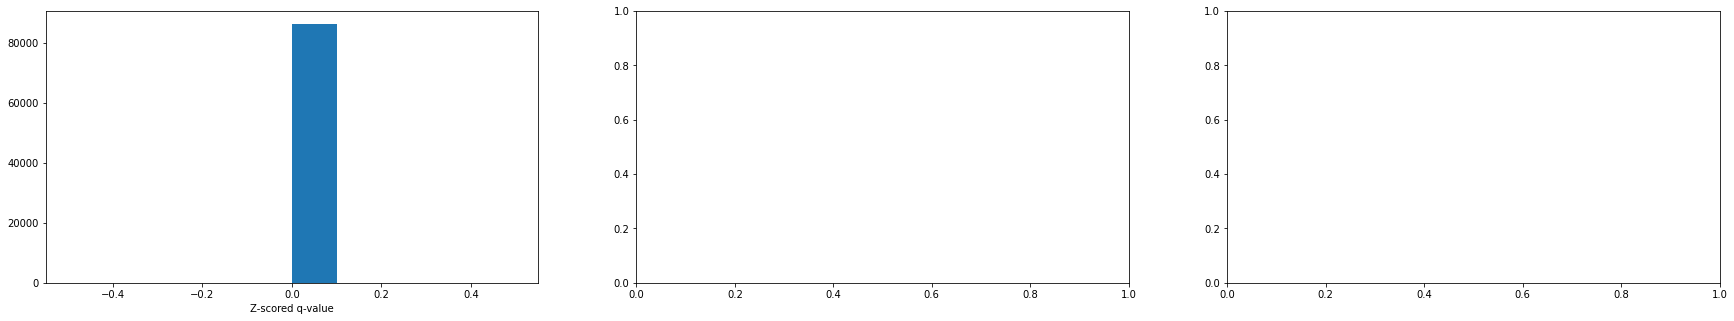

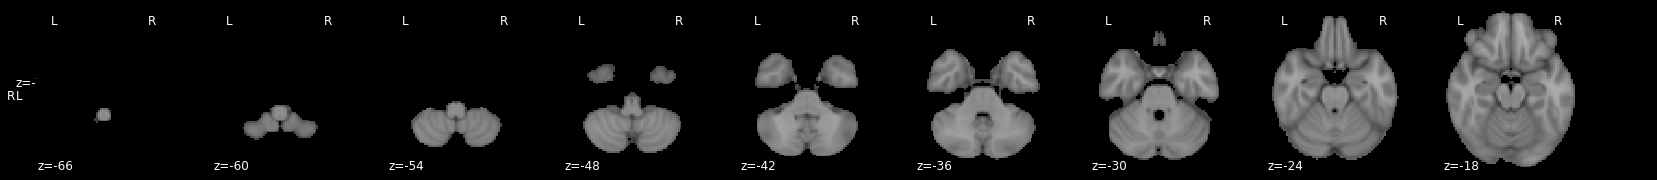

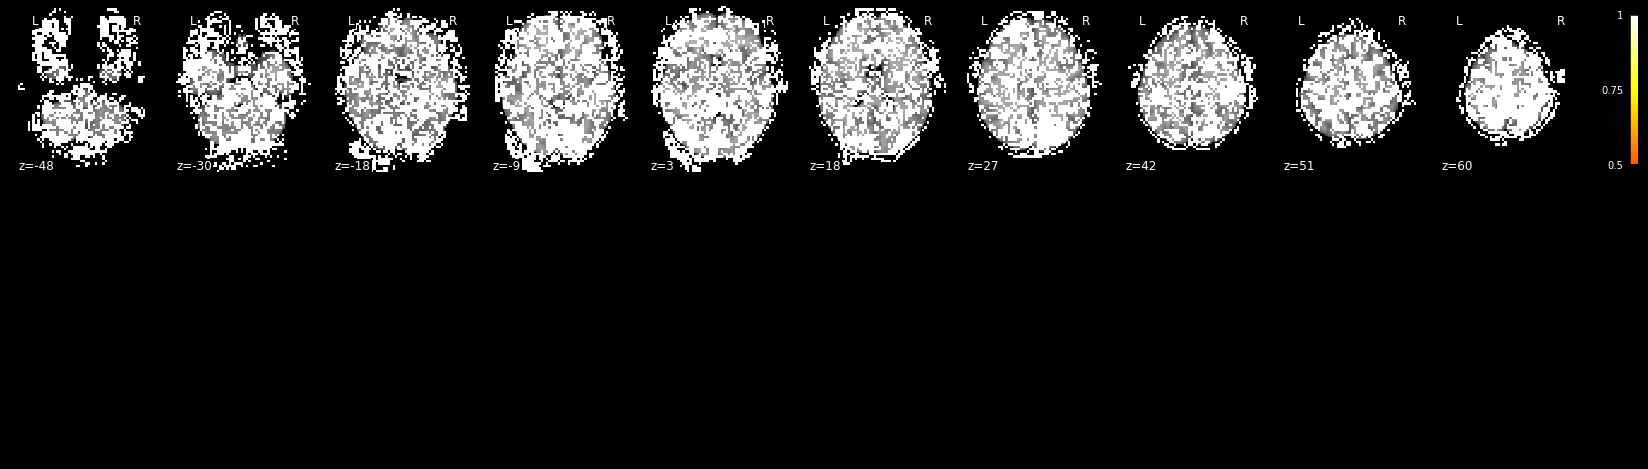

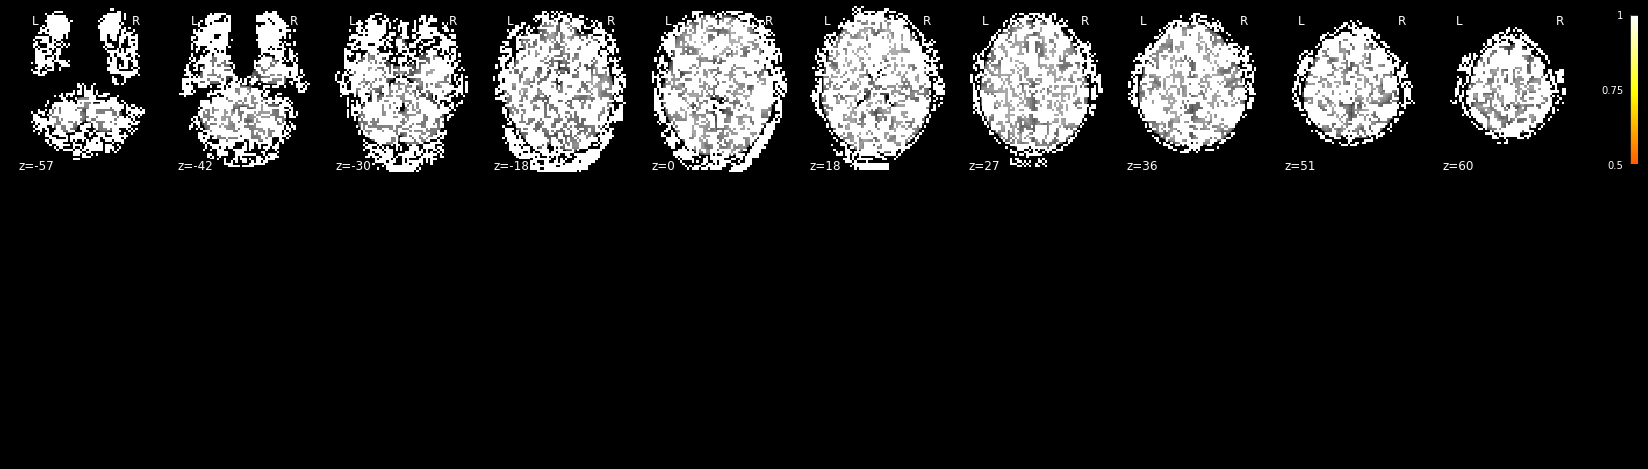

In [53]:
fig, axs = plt.subplots(1, lme.shape[-1], figsize=(30, 5))
for i in range(lme.shape[-1]):
    axs[i].hist(nifti_masker.fit_transform(image.index_img(lme, i)).flatten())
#         axs[i].set_title(labels[i])
    axs[i].set_xlabel('Z-scored q-value')
    plt.show()
    
mean_func = nb.load(f'func_to_standard_group_4d_mean_bin.nii.gz')

for i in range(lme.shape[-1]):
    lme_image = image.index_img(lme, i).get_fdata()
#     lme_mask = (lme_image < 2.4).astype(bool)
#     lme_image[lme_mask] = 0.0
#     lme_image[~lme_mask] = 1.0
    lme_image = nb.Nifti1Image(lme_image, affine=lme.affine)

    if np.any(lme_image.get_fdata() > 0):
        nifti_masker = NiftiMasker(mask_img=lme_image)
        lme_image = nifti_masker.inverse_transform(nifti_masker.fit_transform(mean_func))

            
    plotting.plot_stat_map(
        lme_image,
        display_mode="z",
        cut_coords=10,
        black_bg=True,

    )
    plt.show();
